In [6]:
from Utils import Utils
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import general_utils

# Seeding for reproducibility
tf.config.experimental.enable_op_determinism()
SEED = 42
np.random.seed(SEED)          # NumPy operations
tf.random.set_seed(SEED)      # TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set up the environment
F_val=333.333333333
L_val =10
EIz_val = 111.111e6
utils = Utils(F_val, L_val, EIz_val)

In [11]:
# Train the model
epochs = 101
capture = 10

In [3]:
W, dW_dx, dW_dxx, dW_dxxx, dW_dxxxx, x, w_analytic, model, lambdas, losses = utils.train(epochs=epochs, capture=capture, resample=False, strategy=True) 

Start training of PINN using Tensorflow
epoch 0: loss=8.037e-04, val. loss=2.105e-01, plateau=False
epoch 1: loss=4.353e-04, val. loss=2.331e-01, plateau=False
epoch 2: loss=6.633e-04, val. loss=2.740e-01, plateau=False
epoch 3: loss=9.680e-04, val. loss=3.022e-01, plateau=False
epoch 4: loss=1.897e-03, val. loss=3.185e-01, plateau=False
epoch 5: loss=4.540e-03, val. loss=3.226e-01, plateau=False
epoch 6: loss=7.467e-03, val. loss=3.216e-01, plateau=False
epoch 7: loss=7.327e-03, val. loss=3.195e-01, plateau=False
epoch 8: loss=6.833e-03, val. loss=3.166e-01, plateau=False
epoch 9: loss=6.142e-03, val. loss=3.130e-01, plateau=False
epoch 10: loss=5.387e-03, val. loss=3.126e-01, plateau=False
epoch 11: loss=5.308e-03, val. loss=3.122e-01, plateau=False
epoch 12: loss=5.222e-03, val. loss=3.117e-01, plateau=False
epoch 13: loss=5.131e-03, val. loss=3.112e-01, plateau=False
epoch 14: loss=5.035e-03, val. loss=3.112e-01, plateau=False
epoch 15: loss=5.025e-03, val. loss=3.111e-01, plateau=

In [4]:
# Save output of the model
filename = "./pinn_results_strategy"
general_utils.save_results(filename, W, dW_dx, dW_dxx, dW_dxxx, dW_dxxxx, x, w_analytic, lambdas, losses)  

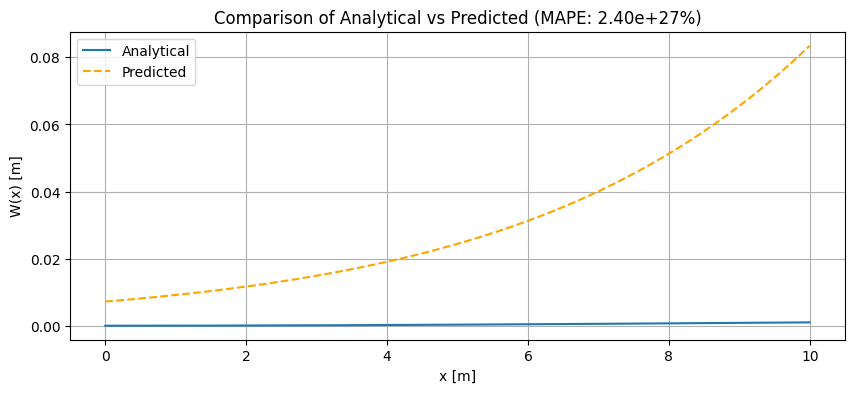

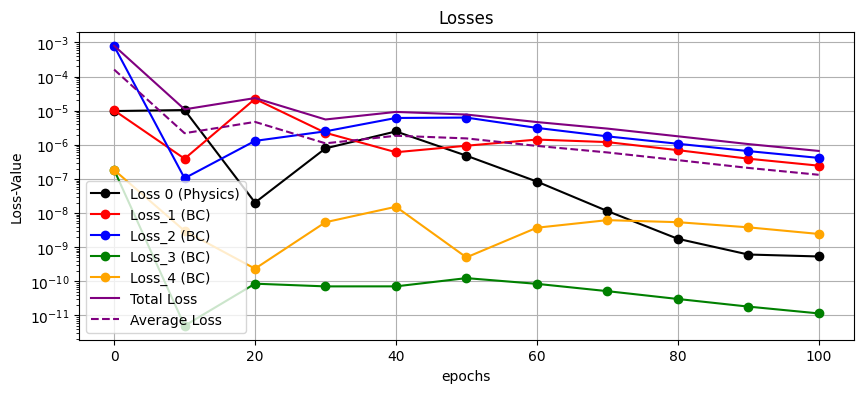

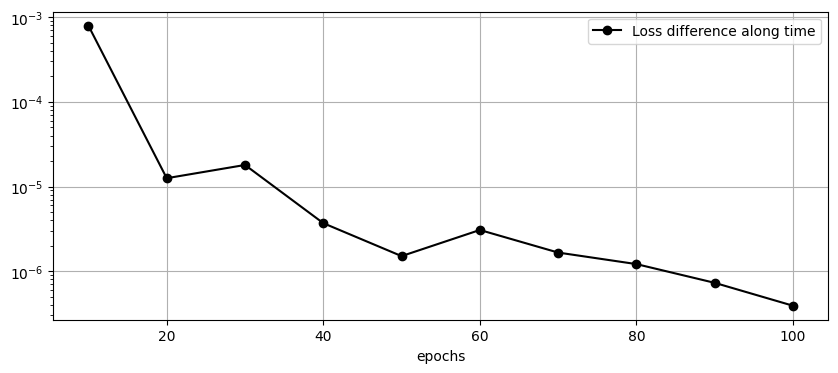

In [12]:
# Plot the results
filename = "./pinn_results_strategy"
filename2 = "./pinn_results_no_strategy"
general_utils.plotting(filename, filename2, capture=capture, figsize=(10, 4),
                    plot_comparison=True,
                    plot_losses=True,
                    plot_lambdas=False,
                    plot_losses_comparison=False,
                    plot_lambdas_comparison=False,
                    plot_differences=True)

In [ ]:
# Import the results
filename_load = "./pinn_results"
W, dW_dx, dW_dxx, dW_dxxx, dW_dxxxx, x, w_analytic, lambdas, losses = general_utils.load_results(filename_load)